In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
birds = pd.read_csv('./image_features.csv')
birds.head()

,FileName,cov_sobel,cov_thresh,corr_sobel,corr_thresh,angle_sobel,angle_thresh,bird
0,./train\100_0.JPG,72.785440,-419.910123,0.017535,-0.097781,32.965553,-29.914553,0
1,./train\100_1.JPG,-666.020141,-780.756963,-0.176170,-0.262482,-43.796468,-29.276191,1
2,./train\10_0.JPG,-823.189321,0.000000,-0.178989,0.000000,-47.447661,0.000000,0
3,./train\10_1.JPG,-217.815641,-444.823813,-0.053471,-0.431951,-76.567046,-73.930350,1
4,./train\11_0.JPG,134.020925,167.889366,0.032787,0.044236,45.071667,6.682792,0


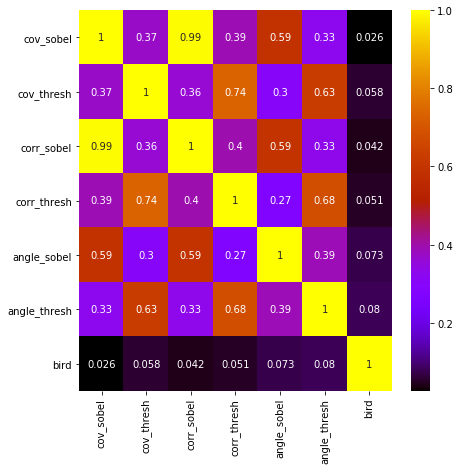

In [5]:
plt.figure(figsize=(7,7))
sns.heatmap(birds.corr(),annot=True,cmap='gnuplot')

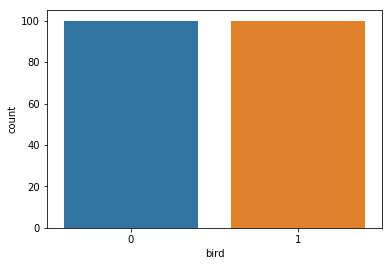

In [6]:
sns.countplot(x='bird',data=birds)

### Descriptive Analysis

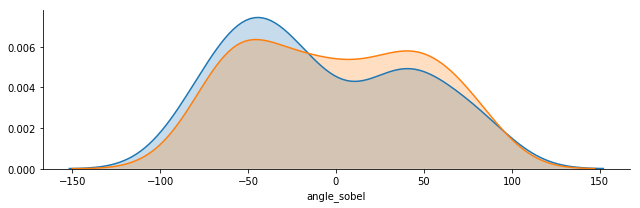

In [11]:
fig = sns.FacetGrid(data=birds,hue='bird',aspect=3)
fig.map(sns.kdeplot,'angle_sobel',shade=True)
plt.show()

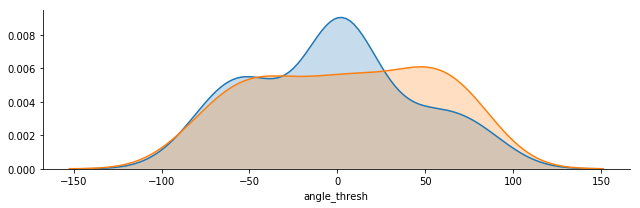

In [12]:
fig = sns.FacetGrid(data=birds,hue='bird',aspect=3)
fig.map(sns.kdeplot,'angle_thresh',shade=True)
plt.show()

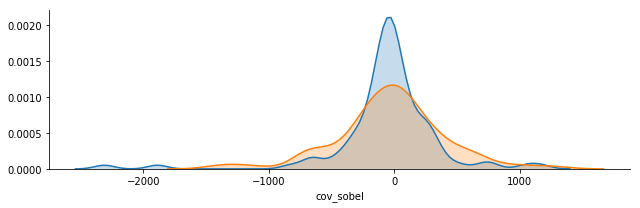

In [13]:
fig = sns.FacetGrid(data=birds,hue='bird',aspect=3)
fig.map(sns.kdeplot,'cov_sobel',shade=True)
plt.show()

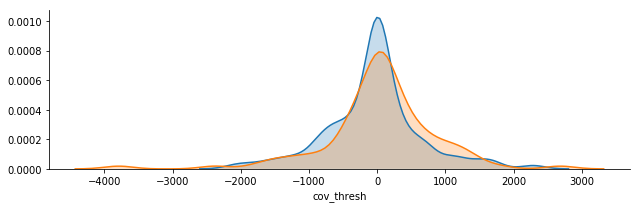

In [14]:
fig = sns.FacetGrid(data=birds,hue='bird',aspect=3)
fig.map(sns.kdeplot,'cov_thresh',shade=True)
plt.show()

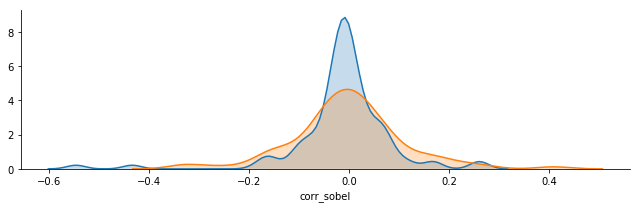

In [15]:
fig = sns.FacetGrid(data=birds,hue='bird',aspect=3)
fig.map(sns.kdeplot,'corr_sobel',shade=True)
plt.show()

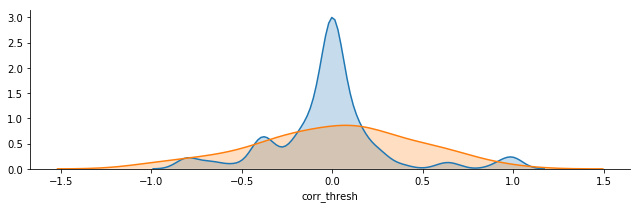

In [16]:
fig = sns.FacetGrid(data=birds,hue='bird',aspect=3)
fig.map(sns.kdeplot,'corr_thresh',shade=True)
plt.show()

In [17]:
birds.keys()

Index(['FileName', 'cov_sobel', 'cov_thresh', 'corr_sobel', 'corr_thresh',
       'angle_sobel', 'angle_thresh', 'bird'],
      dtype='object')

In [19]:
model = smf.glm('bird~cov_sobel+cov_thresh+corr_sobel+corr_thresh+angle_sobel+angle_thresh',
                family=sm.families.Binomial(),data=birds).fit()


In [21]:
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   bird   No. Observations:                  198
Model:                            GLM   Df Residuals:                      191
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -134.06
Date:                Thu, 04 Apr 2019   Deviance:                       268.12
Time:                        01:53:44   Pearson chi2:                     197.
No. Iterations:                     4   Covariance Type:             nonrobust
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0184      0.147     -0.126      0.900      -0.306       0.269
cov_sobel       -0.0071      0.004     -1.821 

In [22]:
model.null_deviance

274.46608113798555